In [1]:
import os
import pandas as pd
import shutil

In [2]:
root_path = r"C:\Users\somir\Desktop\ADM_assignment_3\Newfolder_1\img"
input_images = r"C:\Users\somir\Desktop\ADM_assignment_3\Newfolder_1\input_Images"
df = pd.DataFrame(columns=["ImageName","Label"])

In [3]:
required_list = ["front","side","back","additional"]
row = 0
for folder in os.listdir(root_path):
    if folder.startswith("."):
        continue
    print(folder)
    print("*"*10)
    for sub_folder in os.listdir(os.path.join(root_path,folder)):
        print(sub_folder)
        print("#"*50)
        for sub_folder_2 in os.listdir(os.path.join(root_path,folder,sub_folder)):
            print(sub_folder_2)
            for file in os.listdir(os.path.join(root_path,folder,sub_folder,sub_folder_2)):
                print(file)
                print(file.split("_")[-1])
                if file.split("_")[-1].split(".")[0] in required_list:
                    #print("inside IF")
                    label = folder+"_"+sub_folder+"_"+file.split("_")[-1].split(".")[0]
                    file_name = folder+"_"+sub_folder+"_"+sub_folder_2+file
                    shutil.copy(os.path.join(root_path,folder,sub_folder,sub_folder_2,file),os.path.join(input_images,file_name))
                    df.loc[row,"ImageName"] = file_name
                    df.loc[row,"Label"] = label
                    row = row+1
#             break

MEN
**********
Denim
##################################################
id_00000080
01_1_front.jpg
front.jpg
01_2_side.jpg
side.jpg
01_3_back.jpg
back.jpg
01_7_additional.jpg
additional.jpg
id_00000089
01_1_front.jpg
front.jpg
01_2_side.jpg
side.jpg
01_3_back.jpg
back.jpg
01_6_flat.jpg
flat.jpg
01_7_additional.jpg
additional.jpg
02_1_front.jpg
front.jpg
02_2_side.jpg
side.jpg
02_3_back.jpg
back.jpg
02_6_flat.jpg
flat.jpg
02_7_additional.jpg
additional.jpg
03_1_front.jpg
front.jpg
03_2_side.jpg
side.jpg
03_3_back.jpg
back.jpg
03_6_flat.jpg
flat.jpg
03_7_additional.jpg
additional.jpg
04_1_front.jpg
front.jpg
04_2_side.jpg
side.jpg
04_3_back.jpg
back.jpg
04_6_flat.jpg
flat.jpg
04_7_additional.jpg
additional.jpg
05_1_front.jpg
front.jpg
05_2_side.jpg
side.jpg
05_3_back.jpg
back.jpg
05_6_flat.jpg
flat.jpg
05_7_additional.jpg
additional.jpg
08_1_front.jpg
front.jpg
08_2_side.jpg
side.jpg
08_3_back.jpg
back.jpg
08_4_full.jpg
full.jpg
08_6_flat.jpg
flat.jpg
15_1_front.jpg
front.jpg
15_2_side.j

In [4]:
df.head()

,ImageName,Label
0,MEN_Denim_id_0000008001_1_front.jpg,MEN_Denim_front
1,MEN_Denim_id_0000008001_2_side.jpg,MEN_Denim_side
2,MEN_Denim_id_0000008001_3_back.jpg,MEN_Denim_back
3,MEN_Denim_id_0000008001_7_additional.jpg,MEN_Denim_additional
4,MEN_Denim_id_0000008901_1_front.jpg,MEN_Denim_front


In [5]:
df.Label.unique()

array(['MEN_Denim_front', 'MEN_Denim_side', 'MEN_Denim_back',
       'MEN_Denim_additional', 'MEN_Jackets_Vests_front',
       'MEN_Jackets_Vests_side', 'MEN_Jackets_Vests_additional',
       'MEN_Jackets_Vests_back', 'MEN_Pants_front', 'MEN_Pants_back',
       'MEN_Pants_additional', 'MEN_Pants_side', 'MEN_Shirts_Polos_front',
       'MEN_Shirts_Polos_side', 'MEN_Shirts_Polos_additional',
       'MEN_Shirts_Polos_back', 'MEN_Shorts_front', 'MEN_Shorts_side',
       'MEN_Shorts_back', 'MEN_Shorts_additional', 'MEN_Suiting_front',
       'MEN_Suiting_side', 'MEN_Suiting_back', 'MEN_Suiting_additional',
       'MEN_Sweaters_front', 'MEN_Sweaters_side', 'MEN_Sweaters_back',
       'MEN_Sweaters_additional', 'MEN_Sweatshirts_Hoodies_front',
       'MEN_Sweatshirts_Hoodies_side', 'MEN_Sweatshirts_Hoodies_back',
       'MEN_Sweatshirts_Hoodies_additional', 'MEN_Tees_Tanks_front',
       'MEN_Tees_Tanks_side', 'MEN_Tees_Tanks_back',
       'MEN_Tees_Tanks_additional', 'WOMEN_Blouses_Shirts_fr

In [6]:
df.to_csv(r"C:\Users\somir\Desktop\ADM_assignment_3\Newfolder_1\input.csv",index=False)

In [7]:
import glob
import cv2
import os

import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import tensorflow.keras.optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16, EfficientNetB0
print(tf.__version__)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder

import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import manifold

import matplotlib.pyplot as plt
plt.rcParams.update({'pdf.fonttype': 'truetype'})
from matplotlib import offsetbox
import matplotlib.colors as colors
import matplotlib.cm as cmx

2.7.0


In [8]:
Label_list=['WOMEN_Tees_Tanks_side','WOMEN_Tees_Tanks_front','WOMEN_Tees_Tanks_back','WOMEN_Tees_Tanks_additional']

In [9]:
base_path = r'C:/Users/somir/Desktop/ADM_assignment_3/Newfolder_1'
df = pd.read_csv(base_path + '/input.csv')
df = df[df['Label'].isin(Label_list)]
count=0
data, labels = [], []
for index, row in df.iterrows():
    image_path = f'{base_path}/input_Images/{row["ImageName"]}'
    label = row['Label']
    if index==1000:
        break
    count+=1
    print(count)
    try:
        image = tf.keras.preprocessing.image.load_img(image_path, color_mode='rgb', target_size= (224, 224))
        image = np.array(image)
        data.append(image)
        labels.append(label)
    except Exception:
        print(f'Failed to load {image_path}')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [10]:
print(f'Loaded {len(data)} images') 

label_set = list(set(df['Label']))
print(f'Image classes {label_set}')
print(df[['Label', 'ImageName']].groupby(['Label']).agg(['count']))


#
# Data pre-processing
#
x = np.array(data)
y = np.array(labels)

# EfficientNet models expect their inputs to be float tensors 
# of pixels with values in the [0-255] range.
x = x.astype('float32') 

mlb = MultiLabelBinarizer()
mlb.fit([label_set])
y = mlb.transform(np.atleast_2d(y).T)
print(f'Label mapper classes {mlb.classes_}')


#
# Data split
#
# x - n_samples X height X width X channels
# y - n_samples X onehot_labels
train_test_ratio = 0.75
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_test_ratio)
print(f'x_train: {x_train.shape}, x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')

Loaded 9866 images
Image classes ['WOMEN_Tees_Tanks_front', 'WOMEN_Tees_Tanks_additional', 'WOMEN_Tees_Tanks_side', 'WOMEN_Tees_Tanks_back']
                            ImageName
                                count
Label                                
WOMEN_Tees_Tanks_additional      2185
WOMEN_Tees_Tanks_back            2303
WOMEN_Tees_Tanks_front           2927
WOMEN_Tees_Tanks_side            2451
Label mapper classes ['WOMEN_Tees_Tanks_additional' 'WOMEN_Tees_Tanks_back'
 'WOMEN_Tees_Tanks_front' 'WOMEN_Tees_Tanks_side']
x_train: (7399, 224, 224, 3), x_test: (2467, 224, 224, 3)
y_train: (7399, 4), y_test: (2467, 4)


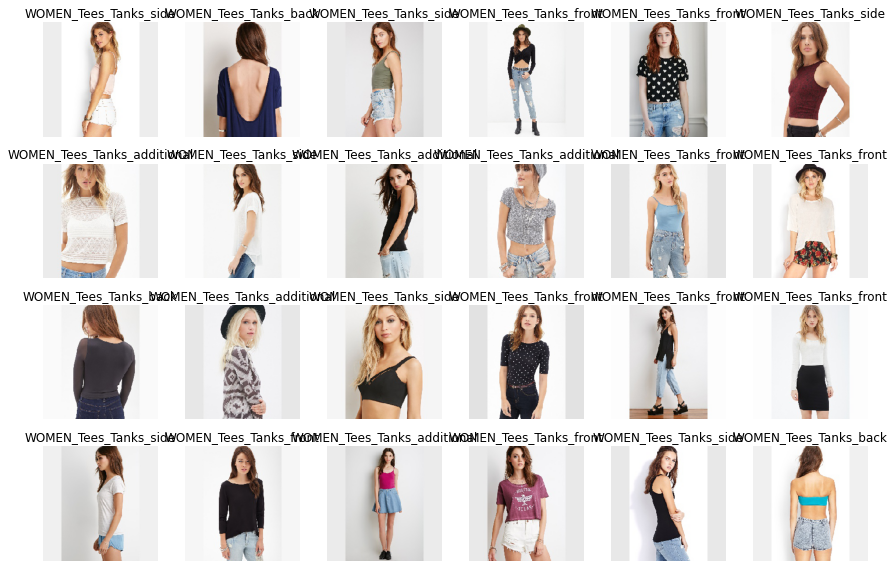

In [11]:
#
# Visualize a data sample 
#
def decode_labels(y, mlb):
    labels = np.array(mlb.inverse_transform(np.atleast_2d(y)))[:, 0]
    return labels

n_col, n_row = 6, 4
offset = 20
f, ax = plt.subplots(n_row, n_col, figsize=(12, 8))
for i in range(n_row):
    for j in range(n_col):
        idx = offset + n_col*i + j
        ax[i, j].imshow(x_train[idx]/255)
        ax[i, j].set_axis_off()
        ax[i, j].set_title(decode_labels(y_train[idx], mlb)[0])
plt.tight_layout()

In [26]:
#
# Fine-tune a pretrained EfficientNet model   
#
model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
    layer.trainable = False
    
mapper = model.output
mapper = Flatten()(mapper) 
mapper = Dense(32, activation='relu', name='embeddigns')(mapper)
mapper = Dense(y_train.shape[1], activation='softmax')(mapper)
transfer_model = Model(inputs=model.input, outputs=mapper)

learning_rate= 0.001
transfer_model.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), metrics = ["accuracy"])
history = transfer_model.fit(x_train, y_train, batch_size = 8, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
925/925 [==============================] - 367s 392ms/step - loss: 1.3744 - accuracy: 0.3441 - val_loss: 1.2186 - val_accuracy: 0.4536
Epoch 2/25
925/925 [==============================] - 372s 402ms/step - loss: 1.1444 - accuracy: 0.4905 - val_loss: 1.0447 - val_accuracy: 0.5302
Epoch 3/25
925/925 [==============================] - 355s 384ms/step - loss: 1.0220 - accuracy: 0.5372 - val_loss: 1.0165 - val_accuracy: 0.5420
Epoch 4/25
925/925 [==============================] - 356s 385ms/step - loss: 0.9762 - accuracy: 0.5463 - val_loss: 0.9749 - val_accuracy: 0.5436
Epoch 5/25
925/925 [==============================] - 360s 389ms/step - loss: 0.9395 - accuracy: 0.5558 - val_loss: 0.9643 - val_accuracy: 0.5371
Epoch 6/25
925/925 [==============================] - 353s 382ms/step - loss: 0.9108 - accuracy: 0.5655 - val_loss: 0.9475 - val_accuracy: 0.5464
Epoch 7/25
925/925 [==============================] - 368s 397ms/step - loss: 0.8817 - accuracy: 0.5699 - val_loss: 0.9402 -

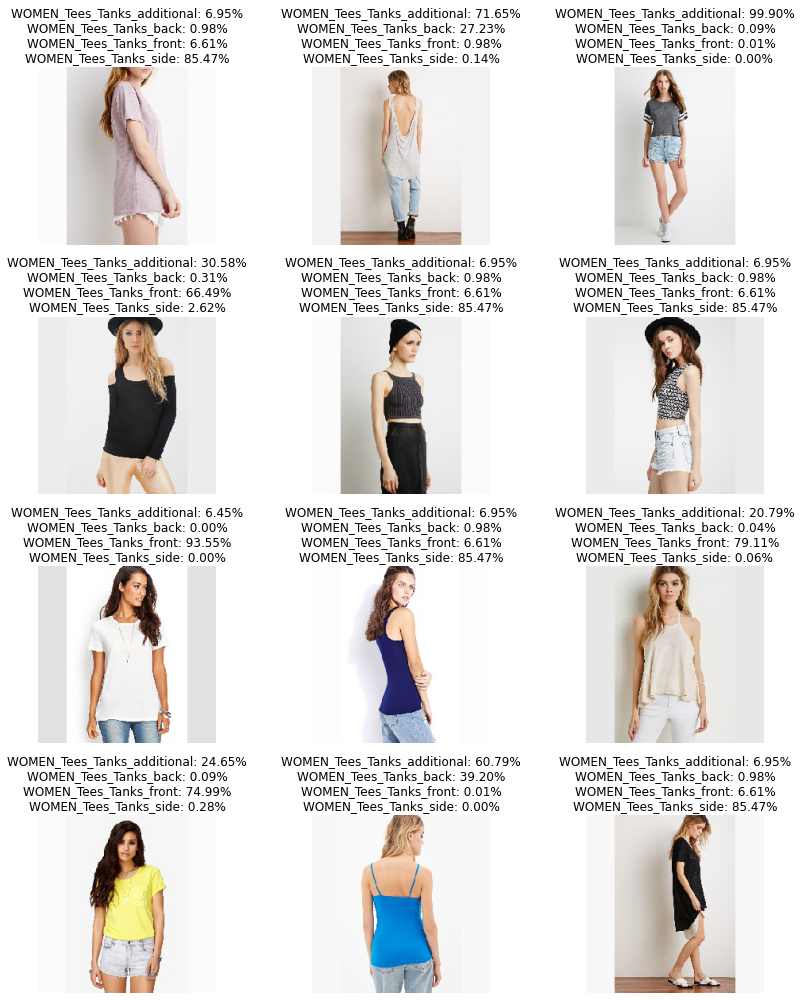

In [27]:
#
# Visualize image class probabilities 
#
def decode_label_prob(y, classes):
    labels = []
    for i ,c in enumerate(classes):
        labels.append(f'{c}: {y[i]:.2%}')
    return labels

# class_probs = transfer_model.predict(x_test[0])[0]


n_col, n_row = 3, 4
f, ax = plt.subplots(n_row, n_col, figsize=(12,14))
for i in range(n_row):
    for j in range(n_col):
        idx = n_col*i + j
        class_probs = transfer_model.predict(x_test[idx:idx+1])[0]
        ax[i, j].imshow(x_test[idx]/255)
        ax[i, j].set_axis_off()
        ax[i, j].set_title('\n'.join(decode_label_prob(class_probs, mlb.classes_)))
        
plt.tight_layout()

In [28]:
#
# Compute the embeddings for visualization
#
n_samples = 1000
embedding_outputs = transfer_model.get_layer('embeddigns').output
embedding_model = Model([transfer_model.input], embedding_outputs)

images = x_test[0:n_samples]
image_embeddings = embedding_model.predict(images)
image_labels = decode_labels(y_test[0:n_samples], mlb)
print(image_embeddings.shape)

(1000, 32)


In [30]:
image_embeddings[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [29]:
embedding_outputs

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'embeddigns')>

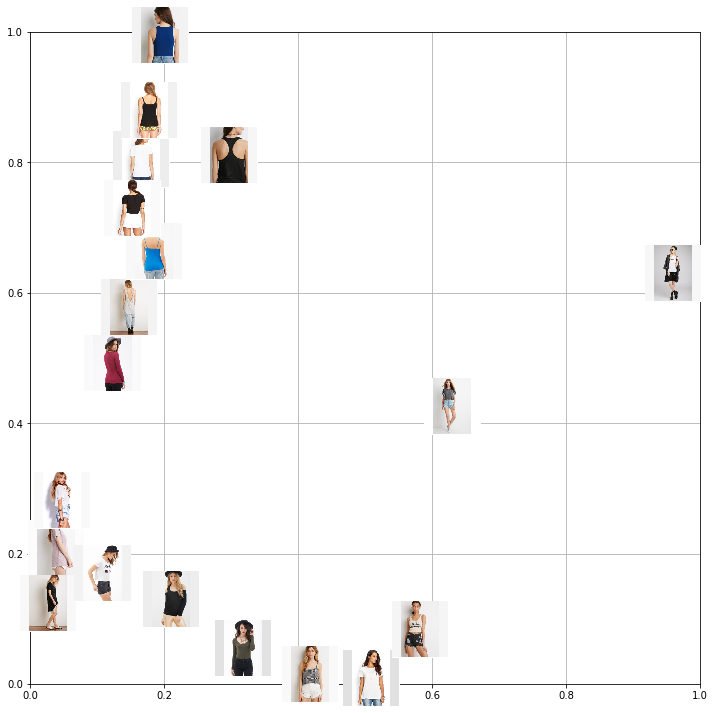

In [31]:
#
# Visualize the 2D-projection of the embedding space with example images (thumbnails)
#
def embedding_plot(X, y_labels, images, mode = 'points', thumbnail_sparsity = 0.005, thumbnail_size = 0.25):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    fig, ax = plt.subplots(1, figsize=(12, 12))
    
    if mode == 'points':
        uniq = list(set(y_labels))
        z = range(1, len(uniq))
        hot = plt.get_cmap('viridis')
        cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
    
        for i in range(len(uniq)):
            indx = np.argwhere(y_labels == uniq[i]).T
            ax.scatter(X[indx, 0], X[indx, 1], s=30, marker='o', 
                    color=scalarMap.to_rgba(i), label=uniq[i], alpha=0.5) 
        plt.legend(loc='upper left')

    if mode == 'thumbnails':
        shown_images = np.array([[1., 1.]])
        for i in range(X.shape[0]):
            if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < thumbnail_sparsity: continue
            shown_images = np.r_[shown_images, [X[i]]]
            thumbnail = offsetbox.OffsetImage(images[i], cmap=plt.cm.gray_r, zoom=thumbnail_size)
            ax.add_artist(offsetbox.AnnotationBbox(thumbnail, X[i], bboxprops = dict(edgecolor='white'), pad=0.0))

    plt.grid(True)
    
tsne = manifold.TSNE(n_components=2, init='pca', perplexity=20, random_state=0)
X_tsne = tsne.fit_transform(image_embeddings)
embedding_plot(X_tsne, y_labels=image_labels, images=images/255, mode = 'thumbnails')


In [32]:
inputs = tensorflow.keras.layers.Input((10, 10, 1))
conv = tensorflow.keras.layers.Conv2DTranspose(1, kernel_size=(2, 2), strides=(2,2))(inputs)
model = Model(inputs=inputs, outputs=conv)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10, 10, 1)]       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 20, 20, 1)        5         
 ranspose)                                                       
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
